**Análisis inicial**

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import random
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
random.seed(261125)   # semilla para repoducibilidad

In [3]:
filmes = pd.read_excel("movies_muestra.xlsx")
print(filmes)

                       title  vote_average  vote_count    revenue     budget  \
0                      Feast          0.00           0          0          0   
1                         Us          0.00           0          0          0   
2            Everyone's Hero          5.86         257   16627188   35000000   
3            Sleeping Beauty          7.50           1          0          0   
4              Sorority Boys          5.39         208   12517488   12000000   
...                      ...           ...         ...        ...        ...   
4995                Victoria          0.00           0          0          0   
4996               Countdown          0.00           0          0          0   
4997  劇場版 イナズマイレブン 最強軍団オーガ襲来          7.63         115          0          0   
4998        Return to Sender          6.38         157     326563    7800000   
4999       A Christmas Carol          6.86        4173  325286646  200000000   

      popularity  runtime              

In [4]:
filmes.describe().round(2).T #descriptivos para las variables categóricas

,count,mean,std,min,25%,50%,75%,max
vote_average,5000.00,3.52,3.32,0.00,0.00,4.75,6.53,10.00
vote_count,5000.00,649.52,2117.20,0.00,0.00,1.00,276.25,29166.00
revenue,5000.00,24801498.53,103455506.42,0.00,0.00,0.00,0.00,1518815515.00
budget,5000.00,7989436.97,27468273.53,0.00,0.00,0.00,100.00,379000000.00
popularity,5000.00,8.44,20.95,0.00,0.60,1.17,12.69,1069.34
runtime,5000.00,60.00,50.63,0.00,7.00,76.00,99.00,780.00


In [5]:
filmes["genre"] = filmes["genre"].fillna("")  #sustituye los NA por un espacio en blanco

genre_adj = filmes["genre"].str.split(",").apply(lambda x: [g.strip() for g in x if g.strip()]) #separa los elementos de la lista

#selecciona un genenero de los listados al azar y lo coloca en una nueva variable

filmes["genre_random"] = genre_adj.apply(lambda x: random.choice(x) if len(x) > 0 else np.nan) #selecciona un genenero

filmes[["genre", "genre_random"]].head() #comprobar

,genre,genre_random
0,"['Action', 'Horror', 'Thriller', 'Comedy']",'Comedy']
1,"['Thriller', 'Horror', 'Mystery']",'Horror'
2,"['Adventure', 'Animation', 'Comedy', 'Family']",'Comedy'
3,"['Drama', 'Romance']",'Romance']
4,['Comedy'],['Comedy']


In [6]:
filmes["country"] = filmes["country"].fillna("")  #sustituye los NA por un espacio en blanco

country_adj = filmes["country"].str.split(",").apply(lambda x: [g.strip() for g in x if g.strip()]) #separa los elementos de la lista

#selecciona un genenero de los listados al azar y lo coloca en una nueva variable

filmes["country_random"] = country_adj.apply(lambda x: random.choice(x) if len(x) > 0 else np.nan) #selecciona un país

filmes["country_random"] = filmes["country_random"].replace("nan", np.nan) #ajustar limpieza final

filmes[["country", "country_random"]].head() #comprobar

,country,country_random
0,,NaN
1,,NaN
2,"Canada, United States of America",Canada
3,,NaN
4,United States of America,United States of America


In [7]:
filmes["language"].unique() #analizar los levels
filmes["language"].value_counts() #y su tamaño

language
en    4013
es     162
fr     157
ja     109
de      94
it      48
ko      38
pt      33
zh      32
ru      29
xx      26
tl      24
hi      23
nl      22
cn      21
da      15
pl      14
sv      14
fa      11
hu       9
tr       8
cs       8
th       8
ar       7
no       6
id       5
ca       4
el       4
ta       4
ro       4
sk       4
te       4
ml       3
fi       3
sq       3
kk       3
bn       3
mn       2
is       2
mr       2
ur       2
ms       2
sr       2
qu       1
si       1
jv       1
km       1
sh       1
kn       1
ku       1
nd       1
sw       1
am       1
ln       1
eu       1
nb       1
Name: count, dtype: int64

In [8]:
# recodificar las etiquetas de idioma en un diccionario, se dejaron los más frecuentes
language_full_sp = {
    "en": "Inglés",
    "es": "Español",
    "fr": "Francés",
    "ja": "Japonés",
    "de": "Alemán",
    "it": "Italiano",
    "ko": "Coreano",
    "pt": "Portugués"
}

# crear una nueva variable

filmes["language_adj"] = filmes["language"].apply( 
    lambda x: language_full_sp[x] if x in language_full_sp else "Otro"
)

filmes["language_adj"].value_counts()

language_adj
Inglés       4013
Otro          346
Español       162
Francés       157
Japonés       109
Alemán         94
Italiano       48
Coreano        38
Portugués      33
Name: count, dtype: int64

In [9]:
filmes["genre_random"].unique() #analizar los levels

array(["'Comedy']", "'Horror'", "'Comedy'", "'Romance']", "['Comedy']",
       "['Drama']", "['Comedy'", "['Animation'", "['Thriller']",
       "'Mystery']", "'Mystery'", "'Drama']", "['Action'", "['Drama'",
       "'Horror']", "['Adventure'", "['Horror'", "'Adventure']",
       "['Thriller'", "'Science Fiction'", "'History']", "'Romance'",
       "['Mystery'", "'Thriller']", "'War']", "'Action'", "'Western']",
       "['Documentary']", "'Fantasy']", "'Family'", "'Science Fiction']",
       "['Horror']", "['Western'", "'Adventure'", "['Fantasy'", nan,
       "['Science Fiction'", "'Crime'", "'Drama'", "['Family'",
       "'Thriller'", "['Science Fiction']", "'Family']", "'Animation'",
       "['War'", "'Fantasy'", "'Crime']", "['Crime'", "['Romance'",
       "['Music'", "'Action']", "['Documentary'", "['War']", "['Action']",
       "'Music'", '[]', "'Music']", "['History'", "['Romance']",
       "'TV Movie']", "'Animation']", "['Animation']", "['TV Movie'",
       "'Documentary']", "['

In [10]:
def limpiar_genero(x): #funcion para homogenizar los géneros
    if pd.isna(x):
        return np.nan
    
    # eliminar corchetes y comillas variadas
    x = x.replace("[", "").replace("]", "")
    x = x.replace("'", "").replace('"', "")
    
    # quitar espacios sobrantes
    x = x.strip()
    
    # colocar NaN si fuera necesario
    if x == "":
        return np.nan
    
    # dividir por coma, limpiar elementos vacíos
    partes = [p.strip() for p in x.split(",") if p.strip() != ""]
    
    # 
    return partes[0] 

# modificar el género
filmes["genre_random"] = filmes["genre_random"].apply(limpiar_genero)

In [11]:
filmes["genre_random"].unique() #comprobar la limpieza

array(['Comedy', 'Horror', 'Romance', 'Drama', 'Animation', 'Thriller',
       'Mystery', 'Action', 'Adventure', 'Science Fiction', 'History',
       'War', 'Western', 'Documentary', 'Fantasy', 'Family', nan, 'Crime',
       'Music', 'TV Movie'], dtype=object)

In [12]:
filmes["genre_random"] = filmes["genre_random"].replace("nan", np.nan) #ajustar limpieza final

In [13]:
#cambiar los géneros a español para los gráficos
generos_sp = {
    "Horror": "Terror",
    "Comedy": "Comedia",
    "Drama": "Drama",
    "Family": "Familiar",
    "Thriller": "Suspenso",
    "Animation": "Animación",
    "Crime": "Crimen",
    "Romance": "Romance",
    "Action": "Acción",
    "War": "Guerra",
    "Mystery": "Misterio",
    "Adventure": "Aventura",
    "Fantasy": "Fantasía",
    "Science Fiction": "Ciencia Ficción",
    "Documentary": "Documental",
    "Music": "Música",
    "Western": "Vaqueros",
    "History": "Historia",
    "TV Movie": "Película de TV"
}

# ajustar la variable
filmes["genre_random"] = filmes["genre_random"].map(generos_sp)

In [14]:
filmes["country_random"].unique() #analizar los levels

array([nan, 'Canada', 'United States of America', 'United Kingdom',
       'Denmark', 'Japan', 'South Africa', 'Spain', 'France', 'Australia',
       'Czech Republic', 'Thailand', 'Belgium', 'Germany', 'Peru',
       'Dominican Republic', 'Netherlands', 'Poland', 'India',
       'New Zealand', 'Italy', 'South Korea', 'Cambodia', 'Switzerland',
       'Mexico', 'Argentina', 'Faeroe Islands', 'Ukraine', 'Iraq',
       'Bulgaria', 'Soviet Union', 'Norway', 'Uruguay', 'Philippines',
       'Ireland', 'Hong Kong', 'Russia', 'Iran', 'Romania', 'Serbia',
       'China', 'Azerbaijan', 'Czechoslovakia', 'Sweden', 'Singapore',
       'Luxembourg', 'Puerto Rico', 'Ethiopia', 'Colombia',
       'Northern Ireland', 'Brazil', 'Portugal', 'Chile', 'Hungary',
       'Pakistan', 'Austria', 'Malaysia', 'Turkey', 'Kenya',
       'Palestinian Territory', 'Bangladesh', 'Kazakhstan', 'Greece',
       'Malta', 'Uganda', 'Indonesia', 'United Arab Emirates', 'Finland',
       'Bolivia', 'Israel', 'Honduras', '

In [15]:
asignar_continentes = {
    # américa
    "Canada": "América",
    "United States of America": "América",
    "Dominican Republic": "América",
    "Mexico": "América",
    "Puerto Rico": "América",
    "Jamaica": "América",
    "Aruba": "América",
    "Honduras": "América",
    "Trinidad and Tobago": "América",
    "Greenland": "América",
    "Peru": "América",
    "Argentina": "América",
    "Uruguay": "América",
    "Colombia": "América",
    "Brazil": "América",
    "Chile": "América",

    # europa
    "United Kingdom": "Europa",
    "Ireland": "Europa",
    "Northern Ireland": "Europa",
    "Germany": "Europa",
    "East Germany": "Europa",
    "Czech Republic": "Europa",
    "Czechoslovakia": "Europa",
    "Belgium": "Europa",
    "Switzerland": "Europa",
    "Spain": "Europa",
    "Italy": "Europa",
    "France": "Europa",
    "Netherlands": "Europa",
    "Poland": "Europa",
    "Sweden": "Europa",
    "Luxembourg": "Europa",
    "Austria": "Europa",
    "Denmark": "Europa",
    "Norway": "Europa",
    "Russia": "Europa",
    "Ukraine": "Europa",
    "Soviet Union": "Europa",
    "Bulgaria": "Europa",
    "Romania": "Europa",
    "Serbia": "Europa",
    "Hungary": "Europa",
    "Portugal": "Europa",
    "Greece": "Europa",
    "Malta": "Europa",
    "Finland": "Europa",
    "Latvia": "Europa",
    "Slovenia": "Europa",
    "Albania": "Europa",
    "Iceland": "Europa",
    "Georgia": "Europa",
    "Armenia": "Europa",
    "Kosovo": "Europa",
    "Faeroe Islands": "Europa",
    "Yugoslavia": "Europa",
    "Slovakia": "Europa",
    "Montenegro": "Europa",


    # asia
    "Japan": "Asia",
    "South Korea": "Asia",
    "Cambodia": "Asia",
    "India": "Asia",
    "Philippines": "Asia",
    "Hong Kong": "Asia",
    "Iran": "Asia",
    "China": "Asia",
    "Singapore": "Asia",
    "Thailand": "Asia",
    "Pakistan": "Asia",
    "Malaysia": "Asia",
    "Turkey": "Asia",
    "Bangladesh": "Asia",
    "Kazakhstan": "Asia",
    "Indonesia": "Asia",
    "Taiwan": "Asia",
    "Israel": "Asia",
    "Lebanon": "Asia",
    "Qatar": "Asia",
    "Mongolia": "Asia",
    "Cyprus": "Asia",
    "Iraq": "Asia",
    "United Arab Emirates": "Asia",
    "Palestinian Territory": "Asia",


    # áfrica
    "South Africa": "África",
    "Ethiopia": "África",
    "Kenya": "África",
    "Morocco": "África",
    "Uganda": "África",
    "Nigeria": "África",
    "Egypt": "África",
    "Mauritius": "África",
    "Malawi": "África",
    "Ghana": "África",

    # oceanía
    "Australia": "Oceanía",
    "New Zealand": "Oceanía"
}

# Crear  nueva variable
filmes["country_continent"] = filmes["country_random"].apply(
    lambda x: asignar_continentes.get(x) if pd.notna(x) else np.nan
)

filmes["country_random"] = filmes["country_random"].replace("nan", np.nan) #ajustar limpieza final

filmes[["country", "country_random","country_continent"]].head()

,country,country_random,country_continent
0,,NaN,NaN
1,,NaN,NaN
2,"Canada, United States of America",Canada,América
3,,NaN,NaN
4,United States of America,United States of America,América


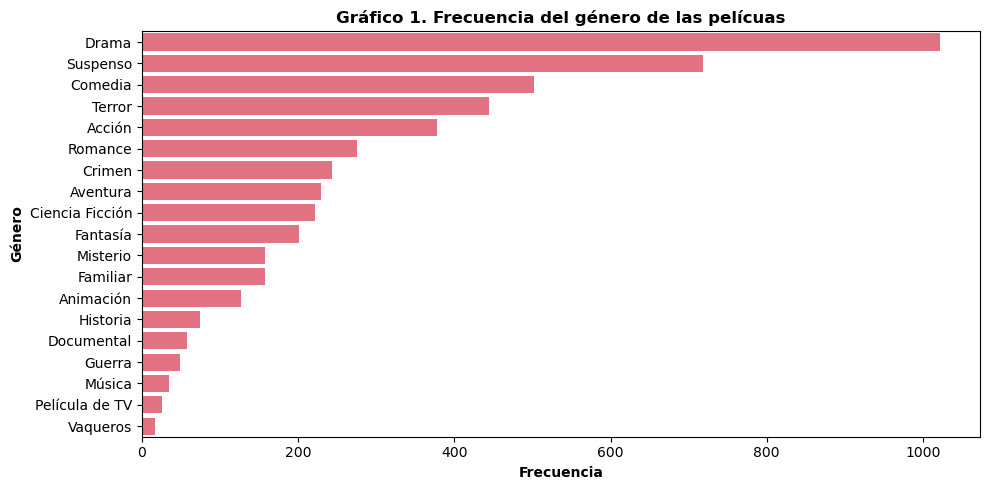

In [16]:
plt.figure(figsize=(10, 5))

sns.countplot( #barras
    data=filmes,
    y="genre_random", #y por el tamaño de las categorías
    order=filmes["genre_random"].value_counts().index, #descendente
    color="#f55f74" 
)

plt.title("Gráfico 1. Frecuencia del género de las pelícuas", fontsize=12, fontweight="bold")
plt.xlabel("Frecuencia", fontweight="bold")
plt.ylabel("Género", fontweight="bold")
plt.tight_layout() #asegura el ajuste

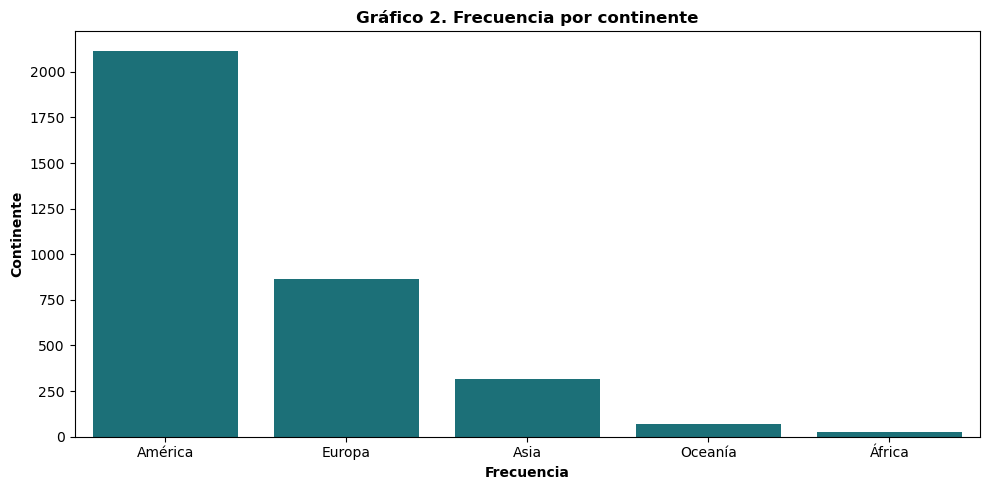

In [17]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data=filmes,
    x="country_continent",
    order=filmes["country_continent"].value_counts().index,
    color="#0d7d87"
)

plt.title("Gráfico 2. Frecuencia por continente", fontsize=12, fontweight="bold")
plt.xlabel("Frecuencia", fontweight="bold")
plt.ylabel("Continente", fontweight="bold")
plt.tight_layout()

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

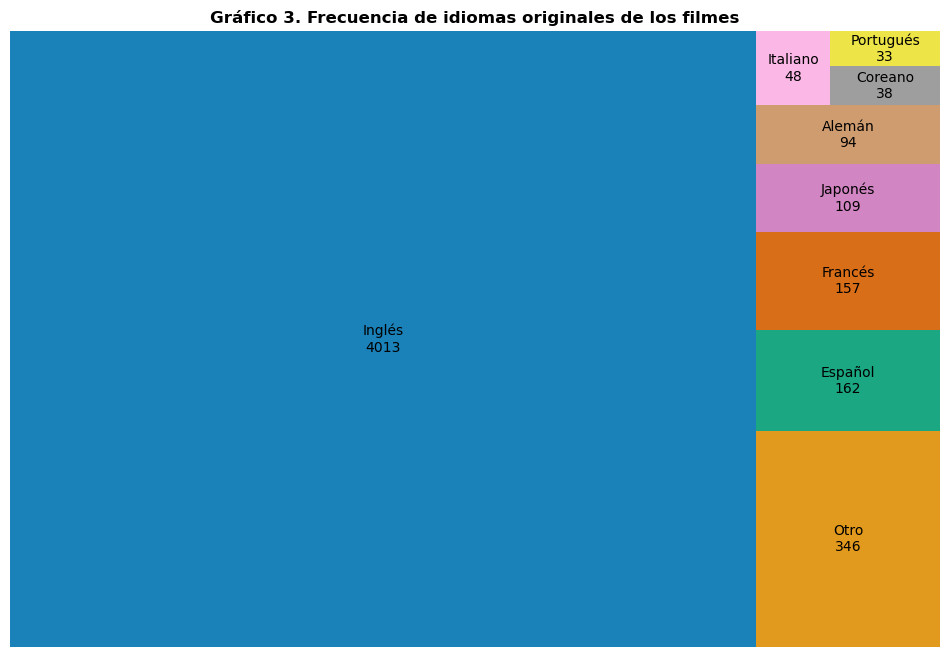

In [22]:
# frecuencias
freq = filmes["language_adj"].value_counts()

# etiquetas (idioma + conteo puntual)
labels = [f"{lang}\n{count}" for lang, count in zip(freq.index, freq.values)]

# paleta de colores
palette = sns.color_palette("colorblind", n_colors=len(freq))

plt.figure(figsize=(12, 8))

squarify.plot( #mapra jeráquico / treemap. altenativa legible al piechart
    sizes=freq.values,
    label=labels,          
    color=palette,
    alpha=0.9,
    text_kwargs={'fontsize': 10}
)

plt.title("Gráfico 3. Frecuencia de idiomas originales de los filmes", fontsize=12, fontweight="bold")
plt.axis("off")

In [19]:
filmes.to_excel("filmes.xlsx", index=False) #para guardar otra base con los ajustes hechos